# Tennis Data Analysis

## Data Exploration

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

/var/folders/5j/3nf89wy94797pmc98lsh3xy00000gn/T/ipykernel_15871/3711532654.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("data/atp_tennis.csv")

In [32]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25362 entries, 0 to 25361
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tournament   25362 non-null  object
 1   Date         25362 non-null  object
 2   Series       25362 non-null  object
 3   Court        25362 non-null  object
 4   Surface      25362 non-null  object
 5   Round        25362 non-null  object
 6   Best of      25362 non-null  int64 
 7   Player_1     25362 non-null  object
 8   Player_2     25362 non-null  object
 9   Winner       25362 non-null  object
 10  Rank_1       25362 non-null  int64 
 11  Rank_2       25362 non-null  int64 
 12  score        25362 non-null  object
 13  1_player_1   25197 non-null  object
 14  1_player_2   25197 non-null  object
 15  2_player_1   24984 non-null  object
 16  2_player_2   24984 non-null  object
 17  3_player_1   12245 non-null  object
 18  3_player_2   12245 non-null  object
 19  4_player_1   2501 non-nul

In [4]:
df.head(10)
df.describe()
df.columns

Index(['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of',
       'Player_1', 'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2',
       'Odd_1', 'Odd_2', 'score'],
      dtype='object')

## Data Cleaning

### Drop unnecessary columns

In [32]:
df.columns

Index(['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of',
       'Player_1', 'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'score',
       '1_player_1', '1_player_2', '2_player_1', '2_player_2', '3_player_1',
       '3_player_2', '4_player_1', '4_player_2', '5_player_1', '5_player_2',
       'Winner_rank'],
      dtype='object')

In [5]:
df = df[['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of',
       'Player_1', 'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'score']]

In [6]:
df.shape

(25362, 13)

### Check for null values

In [7]:
df.isna().sum() / df.shape[0]

Tournament    0.0
Date          0.0
Series        0.0
Court         0.0
Surface       0.0
Round         0.0
Best of       0.0
Player_1      0.0
Player_2      0.0
Winner        0.0
Rank_1        0.0
Rank_2        0.0
score         0.0
dtype: float64

In [15]:
df["Round"].value_counts()

Round
1st Round        11313
2nd Round         7252
Quarterfinals     2521
3rd Round         1757
Semifinals        1279
The Final          641
4th Round          479
Round Robin        120
Name: count, dtype: int64

Split scores into individual columns of score per player per set

In [8]:
# Splits set score into number of games won by each player
def split(temp):
    split_sets = temp.split()
    single_score = []
    for set in split_sets:
        scores = set.split("-")
        for score in scores:
            single_score.append(score) 
    return single_score

score_df = pd.DataFrame(df["score"].apply(split).to_list())

# Splits score into its own column
set_count = 0
for i in range(len(score_df.columns)):
    if i%2 ==0:
        set_count += 1
        name = f"{set_count}_player_1"
    else:
        name = f"{set_count}_player_2"
    df[name] = score_df[score_df.columns[i]]

df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,score,1_player_1,1_player_2,2_player_1,2_player_2,3_player_1,3_player_2,4_player_1,4_player_2,5_player_1,5_player_2
0,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Mayer F.,Giraldo S.,Mayer F.,28,57,6-4 6-4,6,4,6,4,None,None,None,None,None,None
1,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Benneteau J.,Nieminen J.,Nieminen J.,35,41,3-6 6-2 1-6,3,6,6,2,1,6,None,None,None,None
2,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Nishikori K.,Matosevic M.,Nishikori K.,19,49,7-5 6-2,7,5,6,2,None,None,None,None,None,None
3,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Mitchell B.,Baghdatis M.,Baghdatis M.,326,36,4-6 4-6,4,6,4,6,None,None,None,None,None,None
4,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,Klizan M.,Istomin D.,43,30,6-1 6-2,6,1,6,2,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25357,Miami Open,2023-03-30,Masters 1000,Outdoor,Hard,Quarterfinals,3,Cerundolo F.,Khachanov K.,Khachanov K.,31,16,3-6 2-6,3,6,2,6,None,None,None,None,None,None
25358,Miami Open,2023-03-31,Masters 1000,Outdoor,Hard,Quarterfinals,3,Alcaraz C.,Fritz T.,Alcaraz C.,1,10,6-4 6-2,6,4,6,2,None,None,None,None,None,None
25359,Miami Open,2023-03-31,Masters 1000,Outdoor,Hard,Semifinals,3,Khachanov K.,Medvedev D.,Medvedev D.,16,5,6-7 6-3 3-6,6,7,6,3,3,6,None,None,None,None
25360,Miami Open,2023-04-01,Masters 1000,Outdoor,Hard,Semifinals,3,Sinner J.,Alcaraz C.,Sinner J.,11,1,6-7 6-4 6-2,6,7,6,4,6,2,None,None,None,None


Create a new column to store the rank of the match winner

In [9]:
# Determines which player (1 or 2) was the winner
def get_winner_rank(row):
    if row["Winner"] == row["Player_1"]:
        return row["Rank_1"]
    else:
        return row["Rank_2"]

# Sets winner_rank to the rank of the winning player
df["Winner_rank"] = df.apply(get_winner_rank, axis=1)

df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,score,1_player_1,1_player_2,2_player_1,2_player_2,3_player_1,3_player_2,4_player_1,4_player_2,5_player_1,5_player_2,Winner_rank
0,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Mayer F.,Giraldo S.,Mayer F.,28,57,6-4 6-4,6,4,6,4,None,None,None,None,None,None,28
1,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Benneteau J.,Nieminen J.,Nieminen J.,35,41,3-6 6-2 1-6,3,6,6,2,1,6,None,None,None,None,41
2,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Nishikori K.,Matosevic M.,Nishikori K.,19,49,7-5 6-2,7,5,6,2,None,None,None,None,None,None,19
3,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Mitchell B.,Baghdatis M.,Baghdatis M.,326,36,4-6 4-6,4,6,4,6,None,None,None,None,None,None,36
4,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,Klizan M.,Istomin D.,43,30,6-1 6-2,6,1,6,2,None,None,None,None,None,None,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25357,Miami Open,2023-03-30,Masters 1000,Outdoor,Hard,Quarterfinals,3,Cerundolo F.,Khachanov K.,Khachanov K.,31,16,3-6 2-6,3,6,2,6,None,None,None,None,None,None,16
25358,Miami Open,2023-03-31,Masters 1000,Outdoor,Hard,Quarterfinals,3,Alcaraz C.,Fritz T.,Alcaraz C.,1,10,6-4 6-2,6,4,6,2,None,None,None,None,None,None,1
25359,Miami Open,2023-03-31,Masters 1000,Outdoor,Hard,Semifinals,3,Khachanov K.,Medvedev D.,Medvedev D.,16,5,6-7 6-3 3-6,6,7,6,3,3,6,None,None,None,None,5
25360,Miami Open,2023-04-01,Masters 1000,Outdoor,Hard,Semifinals,3,Sinner J.,Alcaraz C.,Sinner J.,11,1,6-7 6-4 6-2,6,7,6,4,6,2,None,None,None,None,11


## Exploratory Data Analysis

### Univariate 

The chart below summarizes the spread of data about the rank of the match winner. The main outlier in the graph is from a match in which a player ranked 1851st won, though there are a number of other outliers  

<Figure size 1200x800 with 0 Axes>

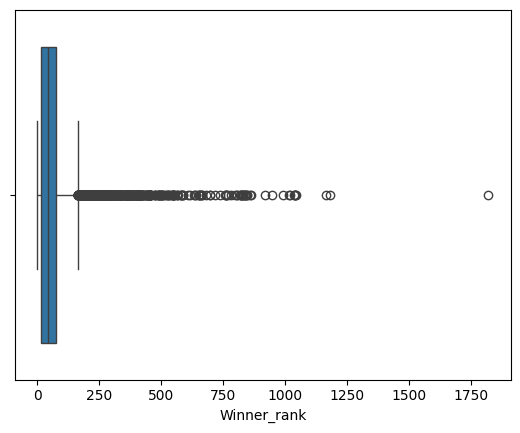

<Figure size 1200x800 with 0 Axes>

In [13]:
sns.boxplot(data=df, x="Winner_rank")
plt.figure(figsize=(12,8))

The chart below shows the distribution of the types of court surfaces the matches were played on. 

Text(0.5, 0.98, 'Histogram of Surfaces Played on')

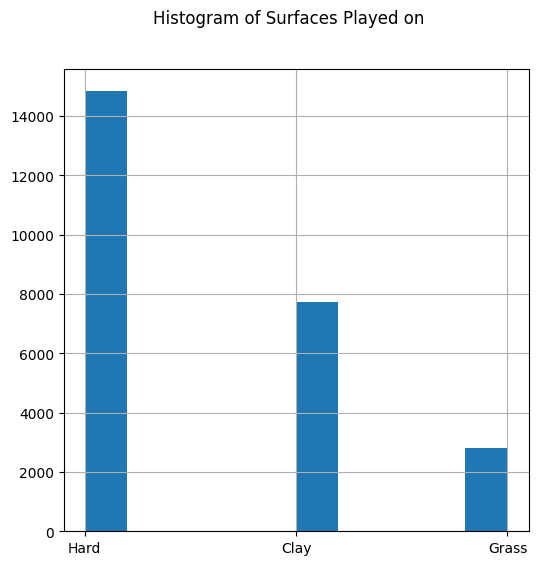

In [38]:
df["Surface"].hist(figsize=(6, 6))
plt.suptitle("Histogram of Surfaces Played on")

The chart belows shows the amount of sets the match was out of

Text(0.5, 0.98, 'Histogram of Number of Sets in the Match')

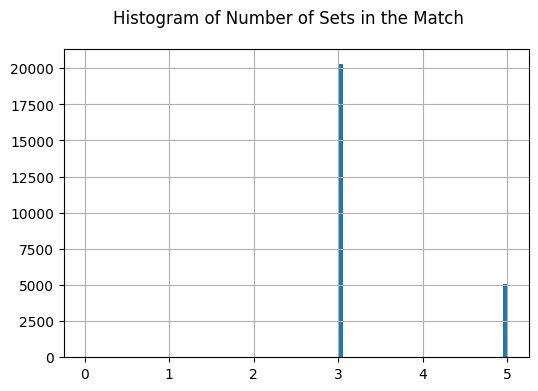

In [50]:
df["Best of"].hist(figsize=(6, 4), bins=100)
plt.suptitle("Histogram of Max Number of Sets in the Match")

The chart below shows the distribution of the level of the tournmanets. 

Text(0.5, 0.98, 'Histogram of Tournament Level')

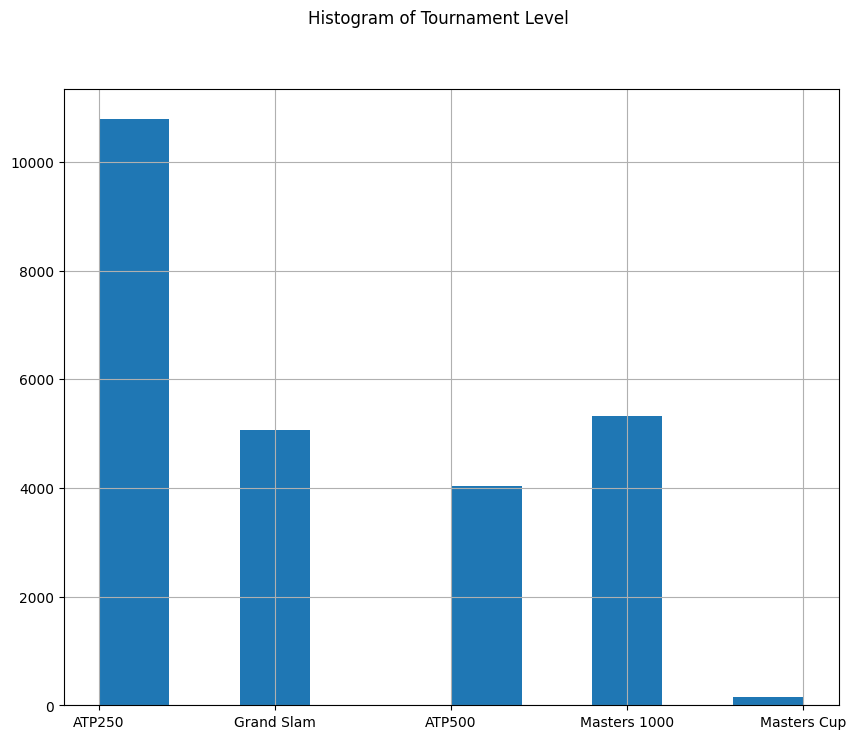

In [55]:
df["Series"].hist(figsize=(10, 8))
plt.suptitle("Histogram of Tournament Level")


### Multivariate

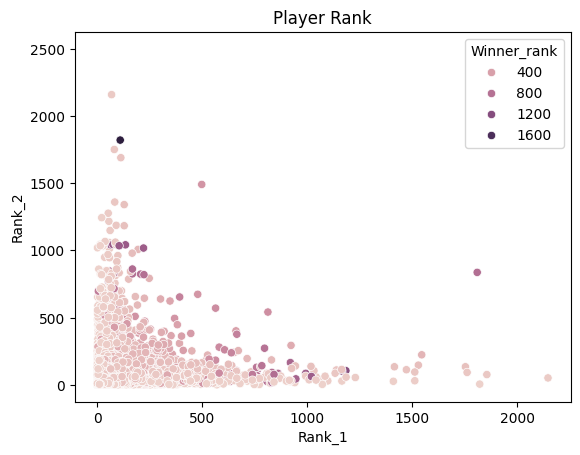

In [60]:
sns.scatterplot(data=df, x="Rank_1", y="Rank_2", hue="Winner_rank")
plt.title("Player Rank")

The graph above displays the relationship between the players' ranks. Points on the graph that are close to or on the line y=x represent a more equal matchup as the players' ranks are close to each other. The color of the point represents that rank range of the player the won the match; lighter colored points represent a higher ranked player winning and darker colored points represent a lower ranked player winning. 

## Statistical Analysis

Q1: In what percent of matches does the winner of the first set win the entire match? 

In [18]:
Q1_df = df[['Player_1', 'Player_2', 'Winner', '1_player_1', '1_player_2']]

In [25]:
set1_match_winner = sum((Q1_df['1_player_1'] > Q1_df['1_player_2']) & (Q1_df['Winner'] == Q1_df['Player_1']) 
                        | (Q1_df['1_player_2'] > Q1_df['1_player_1']) & (Q1_df['Winner'] == Q1_df['Player_2']))

percent = (set1_match_winner/len(Q1_df)) * 100
percent

79.55208579765002

This analysis shows that in 79.55% of all matches, the player that won the first set also won the entire match, indicating that following the first set of a tennis match, one can relatively accurately predict the winner of the match. 

Q2: How does the court surface affect the win rate of a specific player? <-- using Carlos Alcaraz for this analysis

In [47]:
# Creates dataframes filtered down to only the matches won on each respective surface
grass_wins = df.loc[(df['Winner'] == ("Alcaraz C.")) & (df['Surface'] == ("Grass"))]
clay_wins = df.loc[(df['Winner'] == ("Alcaraz C.")) & (df['Surface'] == ("Clay"))]
hardcourt_wins = df.loc[(df['Winner'] == ("Alcaraz C.")) & (df['Surface'] == ("Hard"))]

Percent of grass court matches won:

In [36]:
grass_matches = df.loc[((df['Player_1'] == ("Alcaraz C.")) & (df['Surface'] == ("Grass"))) 
                       | ((df['Player_2'] == ("Alcaraz C.")) & (df['Surface'] == ("Grass")))]

percent = (len(grass_wins)/len(grass_matches)) * 100
percent

66.66666666666666

Percent of clay court matches won:

In [37]:
clay_matches = df.loc[((df['Player_1'] == ("Alcaraz C.")) & (df['Surface'] == ("Clay"))) 
                       | ((df['Player_2'] == ("Alcaraz C.")) & (df['Surface'] == ("Clay")))]

percent = (len(clay_wins)/len(clay_matches)) * 100
percent

79.62962962962963

Percent of hard court matches won:

In [38]:
hardcourt_matches = df.loc[((df['Player_1'] == ("Alcaraz C.")) & (df['Surface'] == ("Hard"))) 
                       | ((df['Player_2'] == ("Alcaraz C.")) & (df['Surface'] == ("Hard")))]

percent = (len(hardcourt_wins)/len(hardcourt_matches)) * 100
percent

73.61111111111111

From this analysis, we have determined that Carlos Alcaraz won 66.66% of his grass court matches, 79.63% of his clay court matches, and 73.61% of his hard court matches. This incidates that Carlos Alcaraz performs best when playing on clay courts. 

Q3: In what round of a tournament is an upset most likely to occur?

In [ ]:
# Creates a dataframe of all upset matches
upset_matches = df.loc[((df['Winner_rank'] == df['Rank_1']) & (df['Rank_1'] > df['Rank_2'])) 
                       | ((df['Winner_rank'] == df['Rank_2']) & (df['Rank_2'] > df['Rank_1']))]


In [22]:
# Filters to only upset matches in the first round
round_1_upsets = upset_matches.loc[upset_matches['Round'] == ('1st Round')]

# Calculates the percent of upset matches that occur in the first round
percent = (len(round_1_upsets)/len(upset_matches)) * 100
percent

47.5875224416517

In [23]:
# Filters to only upset matches in the second round
round_2_upsets = upset_matches.loc[upset_matches['Round'] == ('2nd Round')]

# Calculates the percent of upset matches that occur in the second round
percent = (len(round_2_upsets)/len(upset_matches)) * 100
percent

26.582136445242373

In [24]:
# Filters to only upset matches in the thrid round
round_3_upsets = upset_matches.loc[upset_matches['Round'] == ('3rd Round')]

# Calculates the percent of upset matches that occur in the third round
percent = (len(round_3_upsets)/len(upset_matches)) * 100
percent

5.868491921005385

In [25]:
# Filters to only upset matches in the fourth round
round_4_upsets = upset_matches.loc[upset_matches['Round'] == ('4th Round')]

# Calculates the percent of upset matches that occur in the fourth round
percent = (len(round_4_upsets)/len(upset_matches)) * 100
percent

1.4474865350089767

In [26]:
# Filters to only upset matches in the quarter finals
quarter_upsets = upset_matches.loc[upset_matches['Round'] == ('Quarterfinals')]

# Calculates the percent of upset matches that occur in the quarter finals
percent = (len(quarter_upsets)/len(upset_matches)) * 100
percent

10.132405745062837

In [27]:
# Filters to only upset matches in the semi finals
semi_upsets = upset_matches.loc[upset_matches['Round'] == ('Semifinals')]

# Calculates the percent of upset matches that occur in the semi finals
percent = (len(semi_upsets)/len(upset_matches)) * 100
percent

5.341113105924596

In [28]:
# Filters to only upset matches in the finals
final_upsets = upset_matches.loc[upset_matches['Round'] == ('The Final')]

# Calculates the percent of upset matches that occur in the finals
percent = (len(final_upsets)/len(upset_matches)) * 100
percent

2.5920107719928187

From this analysis, we know that the vast majority of upset matches occur in the first round of tournements, making up 47.58% of all upsets. The next highest is the second round, with 26.58%. Then the quarterfinals with 10.13%, the third round with 5.8%, the semifinals with 5.34%, the finals with 2.59%, and last, the fourth round with 1.45%.